In [1]:
import gefera as gf

['orbits.py', 'animate.py', '__pycache__', 'keplib.cpython-310-x86_64-linux-gnu.so', 'conflib.cpython-310-x86_64-linux-gnu.so', 'phot.py', 'reparam.py', '__init__.py', 'hrchlib.cpython-310-x86_64-linux-gnu.so', 'photlib.cpython-310-x86_64-linux-gnu.so', 'systems.py', 'kep.py', '.ipynb_checkpoints', 'grad_reparam.py']


In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [3]:
from reparam import *

In [4]:
from grad_reparam import *

In [5]:
Pi = np.pi

In [6]:
p_transit = {
'ap':215.0,     #semi-major axis
'tp':-91.25,    #time of periastron passage
'ep':0.1,       #eccentricity
'pp':365,       #orbital period
'wp':0.1*np.pi / 180,    #argument of periastron
'ip':89.8 * np.pi / 180,   #inclination
'am':2,
'tm': -4.2,
'em' : 0.1,
'pm' : 8,
'om' :90 * np.pi / 180,    #longitude of asending node (in radians)
'wm' : -90 * np.pi / 180,
'im' : 90.0 * np.pi / 180,
'mm' : 0.01,    #moon/planet mass ratio
'rp' : 0.1,
'rm' : 0.05,
'u1' : 0.5,
'u2' : 0.3
}


In [7]:
ap,tp,ep,pp,wp,ip,am,tm,em,pm,om,wm,im,mm,r1,r2,u1,u2 = p_transit.values()

In [8]:
new_params = {
    'T':def_T(p_transit['ep'],p_transit['pp'],p_transit['wp'],p_transit['ap'],p_transit['ip']),
    't0':t0(p_transit['ep'],p_transit['wp'],p_transit['pp'],p_transit['tp']),
    'b1':b(p_transit['ap'],p_transit['ip'],p_transit['ep'],p_transit['wp']),
    'r1':p_transit['rp'],
    'phi':phi(p_transit['tm'],p_transit['pm']),
    'm2':p_transit['mm'],
    'r2':p_transit['rm'],
    'a2':p_transit['am'],
    'b2':b(p_transit['am'],p_transit['im'],p_transit['em'],p_transit['wm']),
    'P1':p_transit['pp'],
    'P2':p_transit['pm'],
    'e1cosw1':p_transit['ep']*np.cos(p_transit['wp']),
    'e2cosw2':p_transit['em']*np.cos(p_transit['wm']),
    'e1sinw1':p_transit['ep']*np.sin(p_transit['wp']),
    'e2sinw2':p_transit['em']*np.sin(p_transit['wm']),
    'o2':p_transit['om'],
    'u1':p_transit['u1'],
    'u2':p_transit['u2']

}

In [9]:
T,my_t0,b1,r1,my_phi,m2,r2,a2,b2,p1,p2,e1cosw,e2cosw,e1sinw,e2sinw,o2,u1,u2 = new_params.values()

In [27]:
new_params

{'T': 0.359889361609616,
 't0': -171.0009714536869,
 'b1': 0.7428555010526576,
 'r1': 0.1,
 'phi': -3.2986722862692828,
 'm2': 0.01,
 'r2': 0.05,
 'a2': 2,
 'b2': 1.3471114790620885e-16,
 'P1': 365,
 'P2': 8,
 'e1cosw1': 0.09999984769132877,
 'e2cosw2': 6.123233995736766e-18,
 'e1sinw1': 0.0001745328365898309,
 'e2sinw2': -0.1,
 'o2': 1.5707963267948966,
 'u1': 0.5,
 'u2': 0.3}

In [10]:
old_params = {
    'ap':a1(p1,b1,T,e1cosw,e1sinw),     #semi-major axis
    'tp':t1(my_t0,p1,e1cosw,e1sinw),    #time of periastron passage
    'ep':ecc(e1cosw,e1sinw),       #eccentricity
    'pp':p1,       #orbital period
    'wp':omega(e1cosw,e1sinw),    #argument of periastron
    'ip':i1(b1,p1,T,e1cosw,e2cosw),   #inclination
    'am':a2,
    'tm': t2(my_phi,p2),
    'em' : ecc(e2cosw,e2sinw),
    'pm' : p2,
    'om' :o2,    #longitude of asending node (in radians)
    'wm' : omega(e2cosw,e2sinw),
    'im' : i2(b2,a2,e2cosw,e2sinw),
    'mm' : m2,    #moon/planet mass ratio
    'rp' : r1,
    'rm' : r2,
    'u1' : u1,
    'u2' : u2
}

In [11]:
ap,tp,ep,pp,wp,ip,am,tm,em,pm,om,wm,im,mm,rp,rm,u1,u2 = old_params.values()

In [23]:
new_T = def_T(ep,p1+0.1,wp,ap,ip)
new_t0 = t0(ep,wp,p1+0.1,tp)
po5 = gf.orbits.PrimaryOrbit(new_T,new_t0,e1sinw,e1cosw,p1+0.1,b1)
mo5 = gf.orbits.SatelliteOrbit(a2,my_phi,e2sinw,e2cosw,o2,p2,b2,m2)
sys5 = gf.systems.HierarchicalSystem(po5, mo5)
t = np.linspace(-172, -170, 10000)

flux5, grad5 = sys5.lightcurve(t, new_params['u1'], new_params['u2'], new_params['r1'], new_params['r2'], grad=True)

In [13]:
new_t0

-171.0009933032681

In [14]:
my_t0

-171.0009714536869

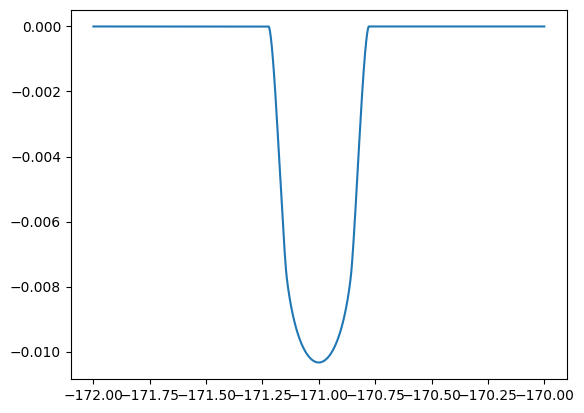

In [15]:
plt.plot(t,flux5)

In [16]:
po4 = gf.orbits.PrimaryOrbit(T,my_t0,e1sinw,e1cosw,p1,b1)
mo4 = gf.orbits.SatelliteOrbit(a2,my_phi,e2sinw,e2cosw,o2,p2,b2,m2)
sys4 = gf.systems.HierarchicalSystem(po4, mo4)
t = np.linspace(-172,-170,10000)
flux4, grad4 = sys4.lightcurve(t, new_params['u1'], new_params['u2'], new_params['r1'], new_params['r2'], grad=True)

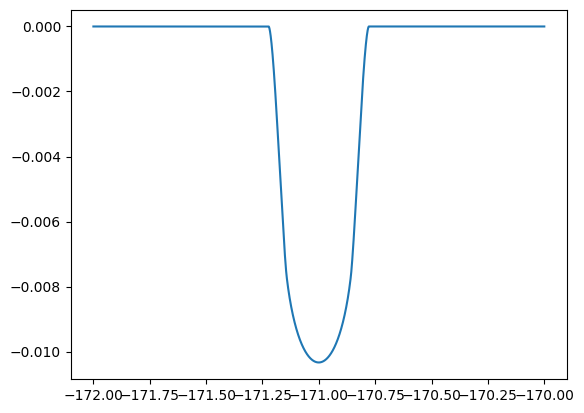

In [17]:
plt.plot(t,flux4)

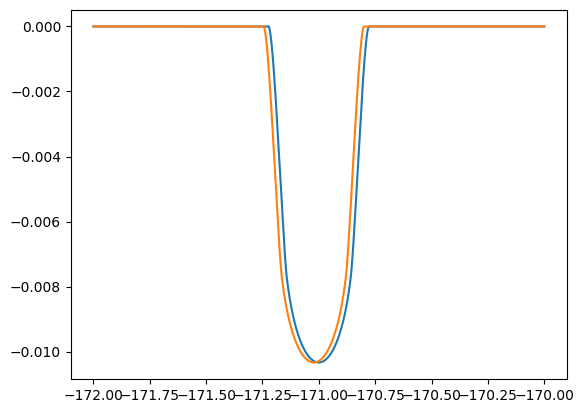

In [24]:
plt.plot(t,flux4)
plt.plot(t,flux5)

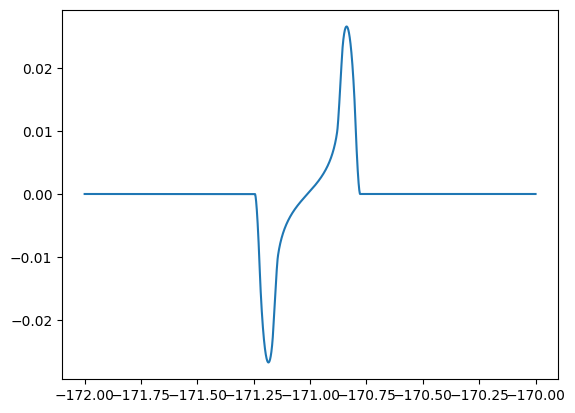

In [25]:
plt.plot(t,(flux5-flux4)/0.1)
#plt.plot(t,flux4)

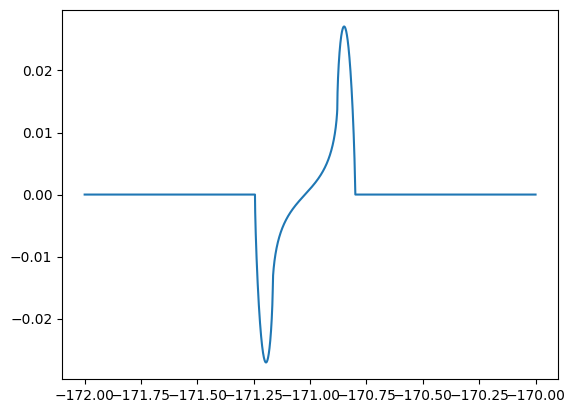

In [26]:
plt.plot(t,grad5['P1'])

In [22]:
#test e1cosw1 derivative
og = {
    'ap':a1(p1,b1,T,e1cosw+1e-8,e1sinw),     #semi-major axis
    'tp':t1(my_t0,p1,e1cosw+1e-8,e1sinw),    #time of periastron passage
    'ep':ecc(e1cosw+1e-8,e1sinw),       #eccentricity
    'pp':p1,       #orbital period
    'wp':omega(e1cosw+1e-8,e1sinw),    #argument of periastron
    'ip':i1(b1,p1,T,e1cosw+1e-8,e2cosw),   #inclination
    'am':a2,
    'tm': t2(my_phi,p2),
    'em' : ecc(e2cosw,e2sinw),
    'pm' : p2,
    'om' :o2,    #longitude of asending node (in radians)
    'wm' : omega(e2cosw,e2sinw),
    'im' : i2(b2,a2,e2cosw,e2sinw),
    'mm' : m2,    #moon/planet mass ratio
    'rp' : r1,
    'rm' : r2,
    'u1' : u1,
    'u2' : u2
}

In [23]:
og

{'ap': 214.99999999999997,
 'tp': 182.49999883816895,
 'ep': 1e-08,
 'pp': 365,
 'wp': 0.0,
 'ip': 1.5673056682909077,
 'am': 2,
 'tm': -4.2,
 'em': 0.0,
 'pm': 8,
 'om': 1.5707963267948966,
 'wm': 0.0,
 'im': 1.5707963267948966,
 'mm': 0.01,
 'rp': 0.1,
 'rm': 0.05,
 'u1': 0.5,
 'u2': 0.3}

In [24]:
newnew = {
    'T':def_T(og['ep'],og['pp'],og['wp'],og['ap'],og['ip']),
    't0':t0(og['ep'],og['wp'],og['pp'],og['tp']),
    'b1':b(og['ap'],og['ip'],og['ep'],og['wp']),
    'r1':og['rp'],
    'phi':phi(og['tm'],og['pm']),
    'm2':og['mm'],
    'r2':og['rm'],
    'a2':og['am'],
    'b2':b(og['am'],og['im'],og['em'],og['wm']),
    'P1':og['pp'],
    'P2':og['pm'],
    'e1cosw1':og['ep']*np.cos(og['wp']),
    'e2cosw2':og['em']*np.cos(og['wm']),
    'e1sinw1':og['ep']*np.sin(og['wp']),
    'e2sinw2':og['em']*np.sin(og['wm']),
    'o2':og['om'],
    'u1':og['u1'],
    'u2':og['u2']

}

In [25]:
newnew

{'T': 0.35713434500969715,
 't0': 364.99999883816895,
 'b1': 0.7504900467682638,
 'r1': 0.1,
 'phi': -3.2986722862692828,
 'm2': 0.01,
 'r2': 0.05,
 'a2': 2,
 'b2': 1.2246467991473532e-16,
 'P1': 365,
 'P2': 8,
 'e1cosw1': 1e-08,
 'e2cosw2': 0.0,
 'e1sinw1': 0.0,
 'e2sinw2': 0.0,
 'o2': 1.5707963267948966,
 'u1': 0.5,
 'u2': 0.3}

In [26]:
p_transit['tp']

-91.25

In [27]:
new_params['t0']

91.25

In [28]:
newnew['t0']

364.99999883816895

In [29]:
po = gf.orbits.PrimaryOrbit(newnew['T'],newnew['t0'],newnew['e1sinw1'],newnew['e1cosw1'],newnew['P1'],newnew['b1'])
mo = gf.orbits.SatelliteOrbit(newnew['a2'],newnew['phi'],newnew['e2sinw2'],newnew['e2cosw2'],newnew['o2'],newnew['P2'],newnew['b2'],newnew['m2'])
sys = gf.systems.HierarchicalSystem(po, mo)
t = np.linspace(-0.6, 0.3, 10000)

flux, grad = sys.lightcurve(t, newnew['u1'], newnew['u2'], newnew['r1'], newnew['r2'], grad=True)

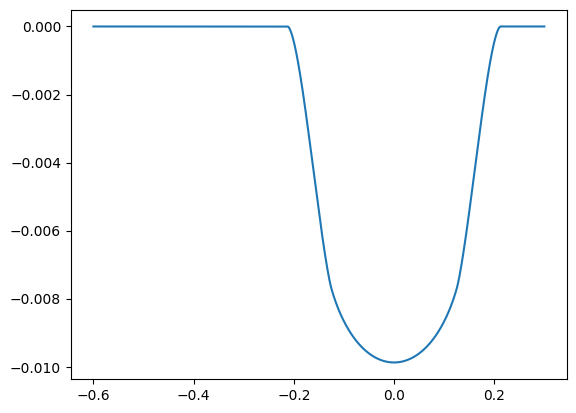

In [30]:
plt.plot(t,flux)

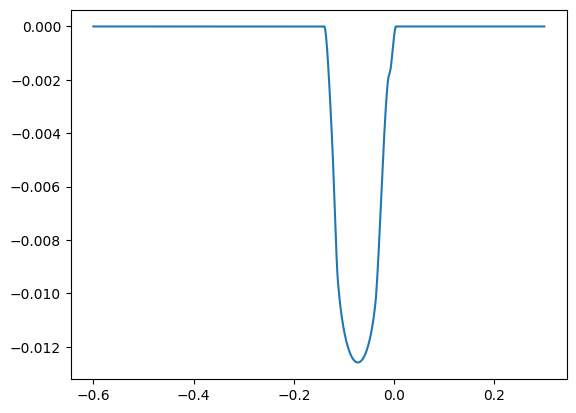

In [31]:
plt.plot(t,flux4)

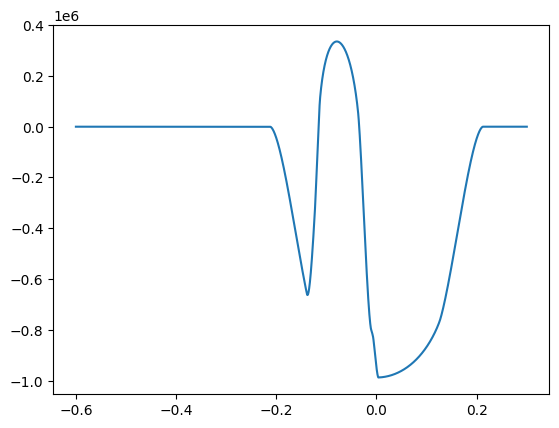

In [32]:
plt.plot(t,(flux-flux4)/1e-8)

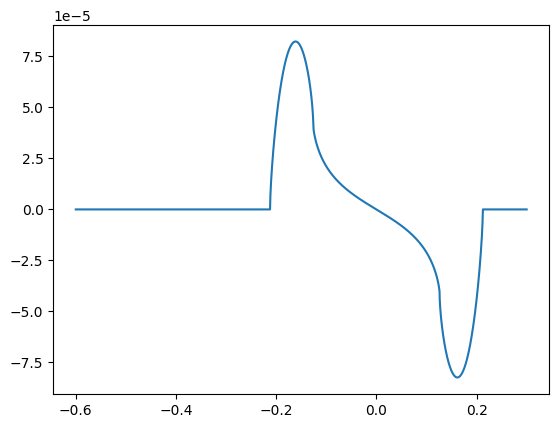

In [33]:
plt.plot(t,grad['e1cosw1'])

In [28]:
new_params

{'T': 0.359889361609616,
 't0': -171.0009714536869,
 'b1': 0.7428555010526576,
 'r1': 0.1,
 'phi': -3.2986722862692828,
 'm2': 0.01,
 'r2': 0.05,
 'a2': 2,
 'b2': 1.3471114790620885e-16,
 'P1': 365,
 'P2': 8,
 'e1cosw1': 0.09999984769132877,
 'e2cosw2': 6.123233995736766e-18,
 'e1sinw1': 0.0001745328365898309,
 'e2sinw2': -0.1,
 'o2': 1.5707963267948966,
 'u1': 0.5,
 'u2': 0.3}

In [29]:
T,my_t0,b1,r1,my_phi,m2,r2,a2,b2,p1,p2,e1cosw,e2cosw,e1sinw,e2sinw,o2,u1,u2 = new_params.values()

In [81]:
po = gf.orbits.PrimaryOrbit(T,my_t0,e1sinw,e1cosw,p1,b1)
mo = gf.orbits.SatelliteOrbit(a2,my_phi,e2sinw,e2cosw,o2,p2,b2,m2)
sys = gf.systems.HierarchicalSystem(po, mo)
t = np.linspace(-173+p1, -170+p1, 10000)

flux, grad = sys.lightcurve(t, u1, u2, r1, r2, grad=True)

In [82]:
my_t0

-171.0009714536869

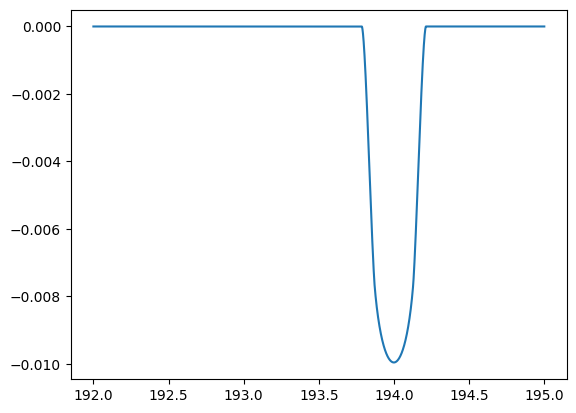

In [83]:
plt.plot(t,flux)

In [84]:
po2 = gf.orbits.PrimaryOrbit(T,my_t0,e1sinw,e1cosw,p1+0.001,b1)
mo2 = gf.orbits.SatelliteOrbit(a2,my_phi,e2sinw,e2cosw,o2,p2,b2,m2)
sys2 = gf.systems.HierarchicalSystem(po2, mo2)
t = np.linspace(-173+p1, -170+p1, 10000)

flux2, grad2 = sys2.lightcurve(t, u1, u2, r1, r2, grad=True)

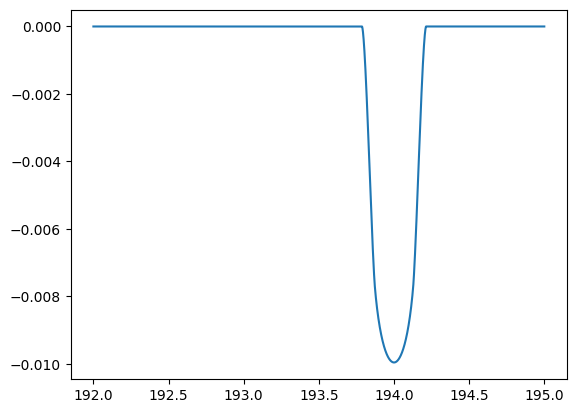

In [85]:
plt.plot(t,flux2)

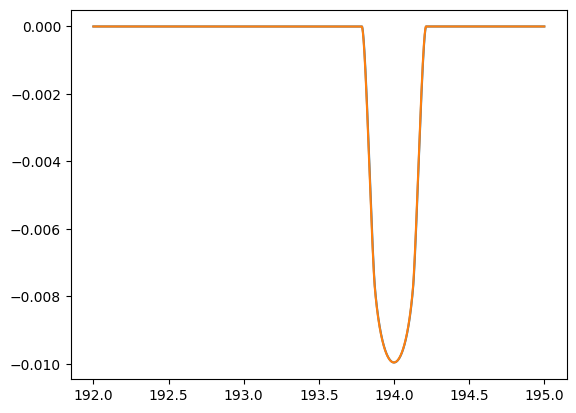

In [86]:
plt.plot(t,flux2)
plt.plot(t,flux)

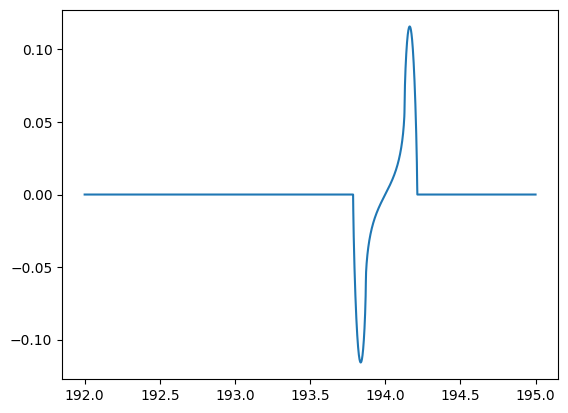

In [90]:
plt.plot(t,(flux-flux2)/0.001)

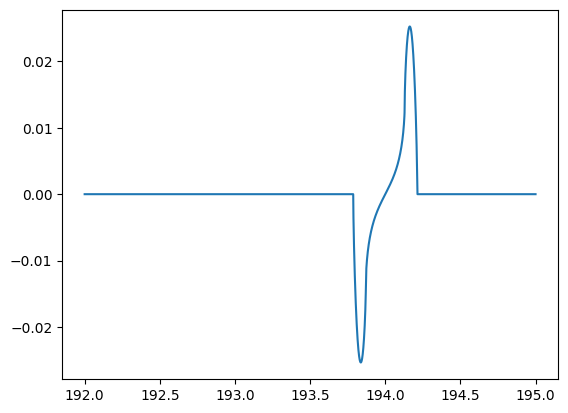

In [91]:
plt.plot(t,grad2['P1'])